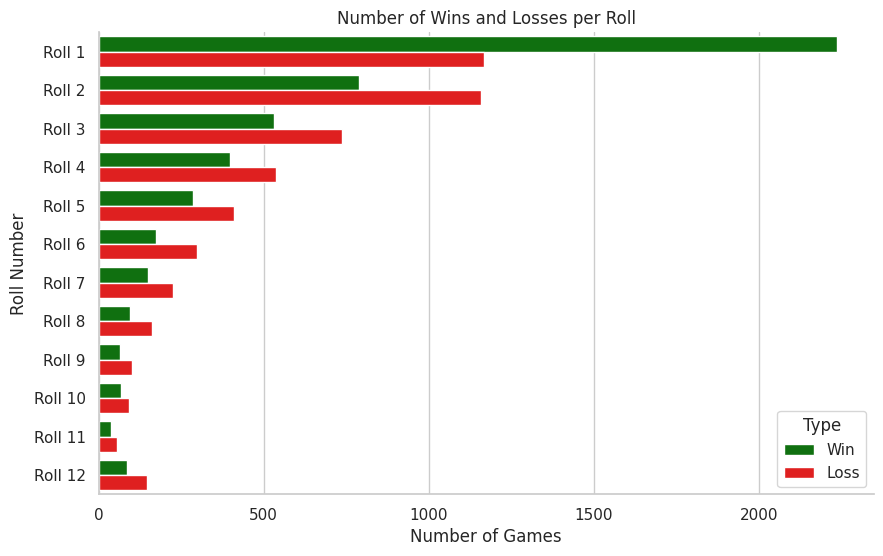

In [4]:
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
from matplotlib.animation import FuncAnimation

sys.argv = ['craps.py', '10000']

def roll_dice():
    """Roll two dice and return their face values as a tuple."""
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)

def display_dice(dice):
    """Display one roll of the two dice."""
    die1, die2 = dice
    # print(f'Player rolled {die1} + {die2} = {sum(dice)}')

def play_game():
    """Simulate a single game of craps."""
    die_values = roll_dice()  # first roll
    display_dice(die_values)
    sum_of_dice = sum(die_values)

    # Track the rolls
    rolls = 1
    wins = 0
    losses = 0

    # Determine game status and point, based on first roll
    if sum_of_dice in (7, 11):  # win
        game_status = 'WON'
        wins += 1
    elif sum_of_dice in (2, 3, 12):  # lose
        game_status = 'LOST'
        losses += 1
    else:  # remember point
        game_status = 'CONTINUE'
        my_point = sum_of_dice
    
    # Continue rolling until player wins or loses
    while game_status == 'CONTINUE':
        die_values = roll_dice()
        display_dice(die_values)
        sum_of_dice = sum(die_values)
        rolls += 1
        
        if sum_of_dice == my_point:  # win by making point
            game_status = 'WON'
            wins += 1
        elif sum_of_dice == 7:  # lose by rolling 7
            game_status = 'LOST'
            losses += 1
            
    return wins, losses, rolls

def main():
    if len(sys.argv) != 2:
        print("Usage: python craps.py <number_of_games>")
        sys.exit(1)

    num_games = int(sys.argv[1])

    # Track wins and losses by roll number
    wins_per_roll = [0] * 12
    losses_per_roll = [0] * 12
    game_lengths = []

    # Simulate the games
    for _ in range(num_games):
        wins, losses, rolls = play_game()
        if rolls <= 12:
            wins_per_roll[rolls - 1] += wins
            losses_per_roll[rolls - 1] += losses
        else:
            wins_per_roll[11] += wins
            losses_per_roll[11] += losses
        game_lengths.append(rolls)

    # Prepare data for seaborn plot
    roll_labels = [f'Roll {i+1}' for i in range(12)]

    data = {
        "Roll": np.tile(roll_labels, 2),
        "Games": np.concatenate([wins_per_roll, losses_per_roll]),
        "Type": ["Win"] * 12 + ["Loss"] * 12
    }

    df = pd.DataFrame(data)

    # Plot using Seaborn
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame):
        ax.clear()
        df_frame = pd.DataFrame({
            "Roll": np.tile(roll_labels[:frame + 1], 2),
            "Games": np.concatenate([wins_per_roll[:frame + 1], losses_per_roll[:frame + 1]]),
            "Type": ["Win"] * (frame + 1) + ["Loss"] * (frame + 1)
        })
        sns.barplot(x="Games", y="Roll", hue="Type", data=df_frame, palette=["green", "red"], orient="h", ax=ax)
        ax.set_title('Number of Wins and Losses per Roll')
        ax.set_xlabel('Number of Games')
        ax.set_ylabel('Roll Number')
        sns.despine()

    # Create the animation
    anim = FuncAnimation(fig, update, frames=12, repeat=False, interval=500)

    # Save the animation as a gif
    anim.save('craps_animation.gif', writer='imagemagick', fps=1)

if __name__ == "__main__":
    main()
